In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection import train_test_split

# Patch for working directory
path = Path.cwd()

# Get the files from the path provided in the OP
files = Path(path).glob('*.csv')  # .rglob to get subdirectories

In [2]:
#Find all csv files in directory and concatenate them
dfs = list()
names = list()
for f in files:
    data = pd.read_csv(f)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['file'] = f.stem
    names.append(f.stem)
    dfs.append(data)
    

df_raw = pd.concat(dfs, ignore_index=True)

In [3]:
#drop last column taht shows csv filename source:
del df_raw[df_raw.columns[-1]]

df_raw

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553  ...   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896  ...   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896  ...   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786  ...   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298  ...   
...            ...        ...        ...         ...        ...  ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127  ...   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213  ...   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213  ...   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835  ...   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701  ...   

       control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
0                       0           0           0           0           0   
1                       0           0           0           0           0   
2                       0           0           0           0           0   
3                       0           0           0           0           0   
4                       0           0           0           0           0   
...                   ...         ...         ...         ...         ...   
78372                   0           0           0           0           0   
78373                   0           0           0           0           0   
78374                   0           0           0           0           0   
78375                   0           0           0           0           0   
78376                   0           0           0           0           0   

       snort_log1  snort_log2  snort_log3  snort_log4    marker  
0               0           0           0           0  NoEvents  
1               0           0           0           0  NoEvents  
2               0           0           0           0  NoEvents  
3               0           0           0           0  NoEvents  
4               0           0           0           0  NoEvents  
...           ...         ...         ...         ...       ...  
78372           0           0           0           0   Natural  
78373           0           0           0           0   Natural  
78374           0           0           0           0   Natural  
78375           0           0           0           0   Natural  
78376           0           0           0           0   Natural  

[78377 rows x 129 columns]

In [4]:
print(df_raw.shape)

df_raw['marker'].value_counts()

(78377, 129)


Attack      55663
Natural     18309
NoEvents     4405
Name: marker, dtype: int64

In [5]:
#----> UNBALANCED DATA

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(15), object(1)
memory usage: 77.1+ MB


In [7]:
# Look at datatypes of coloumns.
def show_dtypes(df):
    for index in range(len(df.dtypes)):
        print(f'{df.columns[index]} -> {df.dtypes[index]}' )
        
show_dtypes(df_raw)

R1-PA1:VH -> float64
R1-PM1:V -> float64
R1-PA2:VH -> float64
R1-PM2:V -> float64
R1-PA3:VH -> float64
R1-PM3:V -> float64
R1-PA4:IH -> float64
R1-PM4:I -> float64
R1-PA5:IH -> float64
R1-PM5:I -> float64
R1-PA6:IH -> float64
R1-PM6:I -> float64
R1-PA7:VH -> float64
R1-PM7:V -> float64
R1-PA8:VH -> float64
R1-PM8:V -> float64
R1-PA9:VH -> float64
R1-PM9:V -> float64
R1-PA10:IH -> float64
R1-PM10:I -> float64
R1-PA11:IH -> float64
R1-PM11:I -> float64
R1-PA12:IH -> float64
R1-PM12:I -> float64
R1:F -> float64
R1:DF -> float64
R1-PA:Z -> float64
R1-PA:ZH -> float64
R1:S -> int64
R2-PA1:VH -> float64
R2-PM1:V -> float64
R2-PA2:VH -> float64
R2-PM2:V -> float64
R2-PA3:VH -> float64
R2-PM3:V -> float64
R2-PA4:IH -> float64
R2-PM4:I -> float64
R2-PA5:IH -> float64
R2-PM5:I -> float64
R2-PA6:IH -> float64
R2-PM6:I -> float64
R2-PA7:VH -> float64
R2-PM7:V -> float64
R2-PA8:VH -> float64
R2-PM8:V -> float64
R2-PA9:VH -> float64
R2-PM9:V -> float64
R2-PA10:IH -> float64
R2-PM10:I -> float64
R2-P

In [8]:
# .copy() is very important otherwise its just a pointer
df = df_raw.copy()

In [9]:
def marker_to_numeric(x):
        if x=='NoEvents': return 0
        if x=='Natural':   return 1
        if x=='Attack': return 2

df['marker'] = df['marker'].apply(marker_to_numeric)
df

R1-PA1:VH     R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0      70.399324  127673.0908  -49.572308  127648.0176 -169.578319   
1      73.688102  130280.7109  -46.300719  130255.6377 -166.278082   
2      73.733939  130305.7842  -46.254883  130280.7109 -166.232245   
3      74.083443  130581.5902  -45.899649  130556.5169 -165.882741   
4      74.553268  131083.0556  -45.424094  131057.9823 -165.424375   
...          ...          ...         ...          ...         ...   
78372 -58.934439  130706.9565 -178.900342  130681.8832   61.094490   
78373 -59.020382  131057.9823 -178.992015  131032.9090   61.002816   
78374 -59.031842  131083.0556 -179.003474  131032.9090   60.997087   
78375 -59.077678  131108.1288 -179.049311  131057.9823   60.951250   
78376 -59.203729  131158.2754 -179.169632  131108.1288   60.825200   

          R1-PM3:V  R1-PA4:IH   R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0      127723.2374  65.689611  605.91099  -57.003571  626.78553  ...   
1      130355.9307  71.831719  483.59351  -50.947407  500.98896  ...   
2      130381.0040  71.808800  483.59351  -50.913030  500.98896  ...   
3      130656.8100  72.152575  482.86107  -50.437475  499.15786  ...   
4      131158.2754  72.118198  484.50906  -50.013486  497.69298  ...   
...            ...        ...        ...         ...        ...  ...   
78372  130782.1763 -60.149109  444.59108  178.808669  449.90127  ...   
78373  131108.1288 -61.507019  451.73237  177.857559  454.66213  ...   
78374  131133.2021 -61.535667  451.91548  177.857559  454.66213  ...   
78375  131158.2754 -61.839335  453.38036  177.725778  455.02835  ...   
78376  131208.4219 -62.446670  455.39457  177.336167  456.12701  ...   

       control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
0                       0           0           0           0           0   
1                       0           0           0           0           0   
2                       0           0           0           0           0   
3                       0           0           0           0           0   
4                       0           0           0           0           0   
...                   ...         ...         ...         ...         ...   
78372                   0           0           0           0           0   
78373                   0           0           0           0           0   
78374                   0           0           0           0           0   
78375                   0           0           0           0           0   
78376                   0           0           0           0           0   

       snort_log1  snort_log2  snort_log3  snort_log4  marker  
0               0           0           0           0       0  
1               0           0           0           0       0  
2               0           0           0           0       0  
3               0           0           0           0       0  
4               0           0           0           0       0  
...           ...         ...         ...         ...     ...  
78372           0           0           0           0       1  
78373           0           0           0           0       1  
78374           0           0           0           0       1  
78375           0           0           0           0       1  
78376           0           0           0           0       1  

[78377 rows x 129 columns]

In [10]:
np.where(df.values >= np.finfo(np.float64).max)

(array([  738,   739,   753, ..., 78352, 78353, 78353], dtype=int64),
 array([26, 26, 26, ..., 55, 26, 55], dtype=int64))

In [11]:
np.isnan(df.values.any())

False

In [12]:
# Replace infinite updated data with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df.dropna(inplace=True)

print(df.shape)

df['marker'].value_counts()

(72073, 129)


2    51445
1    16223
0     4405
Name: marker, dtype: int64

In [13]:
# Due to cleaning up NaNs and infinites we lost about 6000 datapoints, which is not very harmful

In [14]:
# UPSAMPLING:

from sklearn.utils import resample,shuffle

df_minority_NoEvents = df[df['marker'] == 0]
df_minority_Natural = df[df['marker'] == 1]
df_not_minority = df[df['marker'] == 2] 

#upsample the minority classes
df_minority_NoEvents_upsampled = resample(df_minority_NoEvents,random_state=42,n_samples=55663,replace=True)
df_minority_Natural_upsampled = resample(df_minority_Natural,random_state=42,n_samples=55663,replace=True)

df_upsampled = pd.concat([df_minority_NoEvents_upsampled, df_minority_Natural_upsampled, df_not_minority ])

In [15]:
y = df_upsampled['marker']

X = df_upsampled.drop(['marker'],axis =1)

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((130216, 128), (130216,), (32555, 128), (32555,))

In [17]:
def print_score(m):
    print([m.score(X_train, y_train), m.score(X_valid, y_valid)])
    plot_confusion_matrix(m, X_train, y_train)
    plot_confusion_matrix(m, X_valid, y_valid)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


[1.0, 0.9561664874827216]


C:\Users\Patrick_Waldenhofer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Patrick_Waldenhofer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


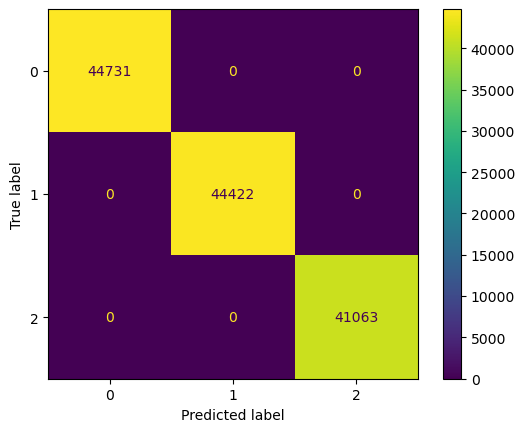

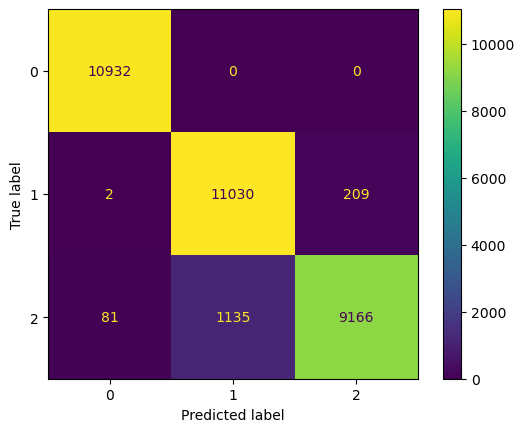

In [20]:
print_score(clf)

In [21]:
print(ccp_alphas)
print(len(ccp_alphas))

[0.00000000e+00 6.98140712e-06 7.13100870e-06 ... 3.43118026e-02
 4.76684050e-02 5.38499932e-02]
3669


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

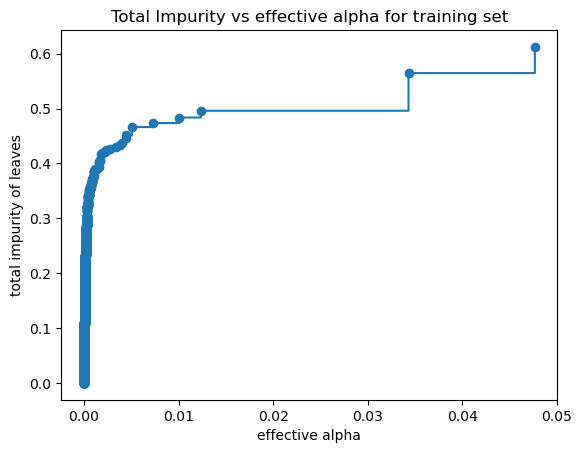

In [22]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [24]:
ccp_alphas_filtered = [x for x in ccp_alphas if x >= 0.001]

print(ccp_alphas_filtered)
print(len(ccp_alphas_filtered))

[0.0010100337845319798, 0.0010106421197098685, 0.0010324948253982343, 0.0010329799852635546, 0.0011077853286696766, 0.0011097182505602349, 0.001199603713435811, 0.001199788246548649, 0.001456786806186234, 0.001541427874766521, 0.001574790522640071, 0.0015907877647046431, 0.0016780830517256484, 0.0016952547976192421, 0.0017651265286534555, 0.0018648498494698296, 0.0022155093807009786, 0.002293165687459492, 0.0027745221659340735, 0.003373942707764463, 0.003862906784332182, 0.003997065913876795, 0.004435401530852437, 0.00448127986356078, 0.005087801300415011, 0.007256008834590835, 0.010073826485986495, 0.012370427797578451, 0.03431180264354487, 0.04766840495380548, 0.05384999316437067]
31


In [25]:
clfs = []
for ccp_alpha in ccp_alphas_filtered:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas_filtered[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05384999316437067


In [26]:
print(len(clfs))

31


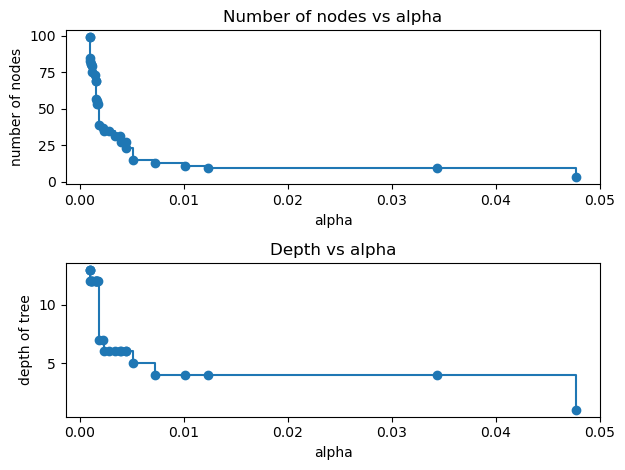

In [27]:
clfs = clfs[:-1]
ccp_alphas_filtered = ccp_alphas_filtered[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas_filtered, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas_filtered, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

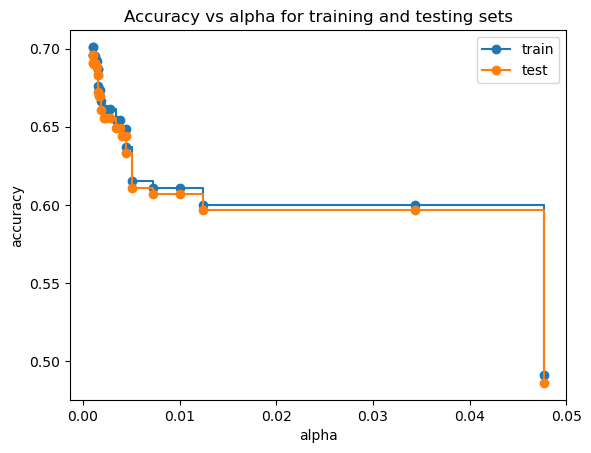

In [28]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas_filtered, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas_filtered, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()